In [4]:
import pandas as pd 
import os 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# World Health Organization dataset 

In [5]:
whofiles= os.listdir('World health Organization/Files To Read')
whofiles

['country_codes',
 'Morticd10_part1',
 'Morticd10_part2',
 'MortIcd7',
 'Morticd8',
 'Morticd9_1',
 'pop_1']

In [6]:
listfiles= os.listdir('World health Organization/List')
listfiles

['List07Causes.xlsx',
 'List08Causes.xlsx',
 'List09Causes.xlsx',
 'List10Causes.xlsx']

In [7]:
list07Causes,list08Causes,list09Causes,list10Causes=[
    pd.read_excel("World health Organization/List/"+i) 
    for i in listfiles if i[-5:] == '.xlsx']

In [8]:
cc,whodf1,whodf2,whodf3,whodf4,whodf5,whodf6= [pd.read_csv("World health Organization/Files To Read/"+i) for i in whofiles]

D:\Users\sasyb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
D:\Users\sasyb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
D:\Users\sasyb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
cc2=cc.set_index('country').to_dict()['name']

In [7]:
whodf1.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [8]:
whodf1['Sex'].replace({1:'male',2:'female',9:'sex unspecified'},inplace=True)
whodf1.shape

(1388106, 39)

In [9]:
whodf1= pd.DataFrame(whodf1)


In [10]:
Deathcol=['Total Death','Death Age 0','Death Age 1','Death Age 2','Death Age 3',
                              'Death Age 4','Death Age 5-9','Death Age 10-14','Death Age 15-19','Death Age 20-24',
                              'Death Age 25-29','Death Age 30-34','Death Age 35-39','Death Age 40-44','Death Age 45-49',
                              'Death Age 50-54','Death Age 55-59','Death Age 60-64','Death Age 65-69','Death Age 70-74',
                              'Death Age 75-79','Death Age 80-84','Death Age 85-89','Death Age 90-94','Death Age 95+','Unspecified Death Age']

In [11]:
whodf1.columns=['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat','Total Death','Death Age 0','Death Age 1','Death Age 2','Death Age 3',
                              'Death Age 4','Death Age 5-9','Death Age 10-14','Death Age 15-19','Death Age 20-24',
                              'Death Age 25-29','Death Age 30-34','Death Age 35-39','Death Age 40-44','Death Age 45-49',
                              'Death Age 50-54','Death Age 55-59','Death Age 60-64','Death Age 65-69','Death Age 70-74',
                              'Death Age 75-79','Death Age 80-84','Death Age 85-89','Death Age 90-94','Death Age 95+','Unspecified Death Age','IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4']

In [12]:
Infantdeaths=['Infant deaths Age 0 day', 'Infant deaths Age 1-6 days',
       'Infant deaths Age 7-27 days', 'Infant deaths Age 28-364 day']
whodf1.rename({'IM_Deaths' + str(i+1):v for i,v in enumerate(Infantdeaths)},axis=1,inplace=True)

In [13]:
whodf1.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Total Death,...,Death Age 75-79,Death Age 80-84,Death Age 85-89,Death Age 90-94,Death Age 95+,Unspecified Death Age,Infant deaths Age 0 day,Infant deaths Age 1-6 days,Infant deaths Age 7-27 days,Infant deaths Age 28-364 day
0,1400,NaN,NaN,2001,101,1000,male,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,female,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,male,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,female,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,male,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [14]:
whodf1['Country']=whodf1['Country'].replace(cc2)

In [15]:
whodf1.drop(['SubDiv','Admin1'],axis=1,inplace = True) 

##### Each list contains a different meaning for the Cause column codes , so each was read in from the documentation to change Cause column from codes to names 

In [16]:
whodf1['List'].unique()

array([101, 103, 104, '104', '10M', 'UE1', '103'], dtype=object)

In [17]:
whodf2['List'].unique()

array([101, 103, 104, '104', 'UE1', '103'], dtype=object)

In [18]:
whodf3['List'].unique()


array(['07A', '07B'], dtype=object)

In [19]:
whodf4['List'].unique()

array(['08A', '08B'], dtype=object)

In [20]:
whodf5['List'].unique()

array(['09A', '09B', '09N', '09C'], dtype=object)

In [21]:
list07Causes.head(2)

,Name,Type
0,A000,All causes
1,A001,Tuberculosis of respiratory system


In [22]:
list08Causes.head(2)

,Name,Type
0,A000,All causes
1,A001,Cholera


In [23]:
list09Causes.head(2)

,Name,Type
0,B00,All causes
1,B01,Intestinal infectious diseases


In [24]:
list10Causes.head(2)

,Name,Type
0,1000,All causes
1,1001,Certain infectious and parasitic diseases


In [25]:
Causeslists=[list07Causes,list08Causes,list09Causes,list10Causes]


In [26]:
list07,list08,list09,list10 = [cause.astype(str).set_index('Name').to_dict()['Type'] for cause in Causeslists]

In [27]:
whodf3['Cause']= whodf3['Cause'].replace(list07)
whodf3.head(2)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1125,NaN,NaN,1955,07A,All causes,1,1,8,107822,...,2013.0,2727.0,4126.0,NaN,NaN,214,40543,NaN,NaN,NaN
1,1125,NaN,NaN,1955,07A,All causes,2,1,8,105750,...,1745.0,3465.0,5963.0,NaN,NaN,82,39632,NaN,NaN,NaN


In [28]:
assert (whodf2.columns==whodf3.columns).all()

### Upon confirming that whodf1 share similar columns with whodf2 to whodf5 
### Data Cleaning has been applied to all the remaining dataframes

In [29]:
whodftobechanged=[whodf2,whodf3,whodf4,whodf5]
[v.rename({'Deaths' + str(i+1):v for i, v in enumerate(Deathcol)},axis=1,inplace= True) for v in whodftobechanged]

[None, None, None, None]

In [30]:
[v.rename({'IM_Deaths' + str(i+1):v for i,v in enumerate(Infantdeaths)},axis=1,inplace=True)for v in whodftobechanged]

[None, None, None, None]

In [31]:
[v['Sex'].replace({1:'male',2:'female',9:'sex unspecified'},inplace=True)for v in whodftobechanged]

[None, None, None, None]

In [32]:
[v['Country'].replace(cc2, inplace=True) for v in whodftobechanged]

[None, None, None, None]

In [33]:
whodf1['Cause'].replace(list10, inplace = True)

In [34]:
whodf2['Cause'].replace(list10, inplace = True)

In [35]:
whodf4['Cause'].replace(list08, inplace = True)

In [36]:
whodf5['Cause'].replace(list09, inplace = True)

In [37]:
[v.drop(['SubDiv','Admin1','Frmat','IM_Frmat'],axis=1,inplace = True) for v in whodftobechanged]

[None, None, None, None]

In [38]:
whodf1.drop(['Frmat','IM_Frmat'],axis=1,inplace = True)

In [39]:
whodf6.columns

Index(['Country', 'Admin1', 'SubDiv', 'Year', 'Sex', 'Frmat', 'Pop1', 'Pop2',
       'Pop3', 'Pop4', 'Pop5', 'Pop6', 'Pop7', 'Pop8', 'Pop9', 'Pop10',
       'Pop11', 'Pop12', 'Pop13', 'Pop14', 'Pop15', 'Pop16', 'Pop17', 'Pop18',
       'Pop19', 'Pop20', 'Pop21', 'Pop22', 'Pop23', 'Pop24', 'Pop25', 'Pop26',
       'Lb'],
      dtype='object')

In [40]:
Populationstitles= ['Population all ages','Population age 0 year','Population age 1 year','Population age 2 years',
'Population age 3 years','Population age 4 years','Population age 5-9 years','Population age 10-14 years',
'Population age 15-19 years','Population age 20-24 years',"Population age 25-29 years",
"Population age 30-34 years",'Population age 35-39 years','Population age 40-44 years','Population age 45-49 years',
'Population age 50-54 years','Population age 55-59 years','Population age 60-64 years','Population age 65-69 years',
'Population age 70-74 years','Population age 75-79 years','Population age 80-84 years','Population age 85-89 years',
'Population age 90-94 years','Population age 95 years and over','Population age unspecified']
whodf6.rename({'Pop' + str(i+1):v for i,v in enumerate(Populationstitles)}, axis = 1, inplace = True)


In [41]:
whodf6.rename({'Lb':'Live births'},axis=1, inplace= True)

In [42]:
whodf6.drop(['Admin1','SubDiv','Frmat'],axis = 1, inplace = True)

In [43]:
whodf6['Sex'].replace({1:'male',2:'female',9:'sex unspecified'},inplace=True)

In [44]:
whodf6['Country']=whodf6['Country'].replace(cc2)

In [45]:
whodf1[whodf1['Cause']=='A00'].head(2)

,Country,Year,List,Cause,Sex,Total Death,Death Age 0,Death Age 1,Death Age 2,Death Age 3,...,Death Age 75-79,Death Age 80-84,Death Age 85-89,Death Age 90-94,Death Age 95+,Unspecified Death Age,Infant deaths Age 0 day,Infant deaths Age 1-6 days,Infant deaths Age 7-27 days,Infant deaths Age 28-364 day
9455,Egypt,2000,103,A00,male,2,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
9456,Egypt,2000,103,A00,female,1,0.0,1.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN


# Merging all the cleaned dataframes to whodfs


In [46]:
whodfs= pd.concat([whodf1,whodf2,whodf3,whodf4,whodf5],ignore_index=True)

In [47]:
# whodfs = whodfs.loc[whodfs['Total Death'] > 10000]

In [48]:
whodfs.shape

(5328910, 35)

In [92]:
whodfs['Cause'].value_counts().head(2)

Diabetes mellitus    7550
Anaemias             7541
Name: Cause, dtype: int64

In [91]:
whodfs['Sex'].value_counts().head(2)

male      2730750
female    2579338
Name: Sex, dtype: int64

In [90]:
whodfs['Country'].value_counts().head(2)

Brazil                      274522
United States of America    146624
Name: Country, dtype: int64

In [52]:
whodfs['Country'].nunique()

157

In [53]:
countrysexvsdeath=whodfs.groupby(['Country', 'Sex']).sum()['Total Death']

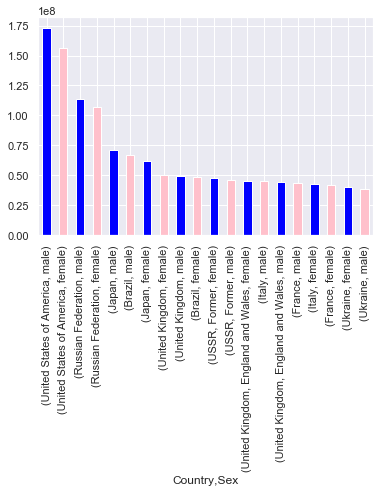

In [54]:
countrysexvsdeath.nlargest(20).plot(kind='bar',color={'blue':'male','pink':'female'})

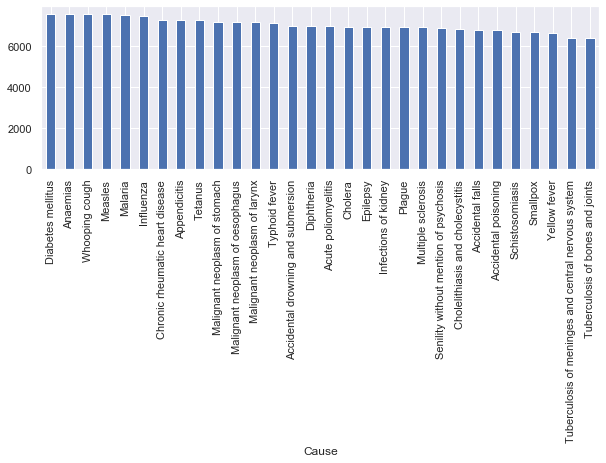

In [55]:
whodfs.groupby('Cause').count()['Country'].nlargest(30,'all').plot(kind='bar',figsize=(10,3))

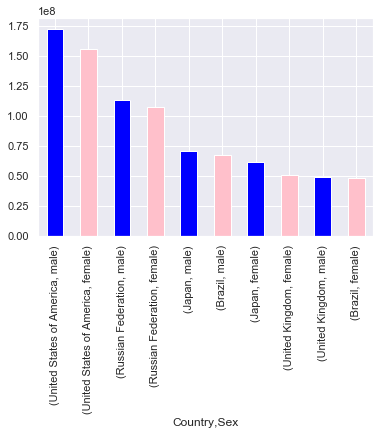

In [56]:
countrysexvsDeath=whodfs.groupby(['Country','Sex']).sum()['Total Death'].nlargest(10).plot(kind='bar',color={'blue':'male','pink':'female'})

In [57]:
sexcausevsdeath=whodfs.groupby(['Sex','Cause'])['Total Death'].sum()

In [58]:
sexcausevsdeath.shape

(25101,)

In [59]:
sexcausevsdeath=sexcausevsdeath.loc[sexcausevsdeath>10000000]

In [60]:
sexcausevsdeath.shape

(24,)

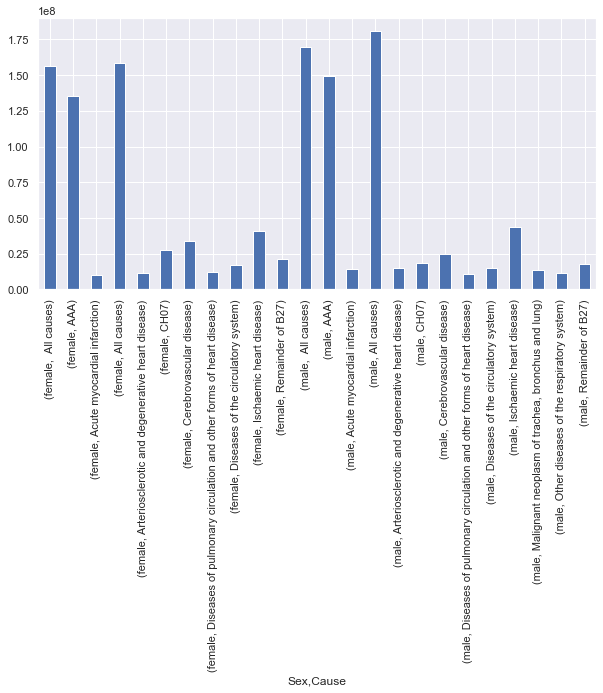

In [61]:
sexcausevsdeath.plot(kind='bar',figsize=(10,5))

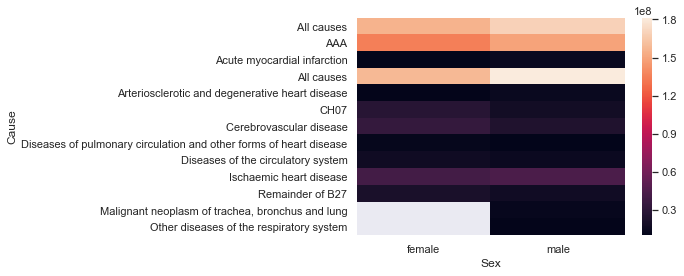

In [62]:
sns.heatmap(sexcausevsdeath.unstack(0))

In [63]:
countryvssex= whodfs.groupby('Country')['Sex'].count()

In [64]:
countryvssex=countryvssex[countryvssex>600]

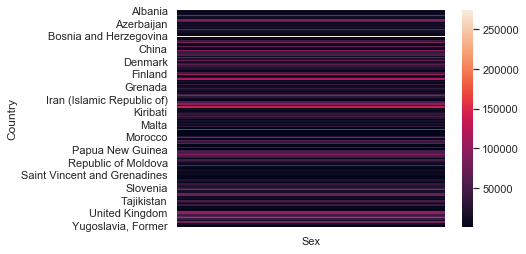

In [65]:
sns.heatmap(countryvssex.to_frame())

##### functionizing the groupby with count and sum and creating heatmaps 

In [66]:
def groupbycount_heatmap(df,a,b):
    dfab=df.groupby([a])[b].count().to_frame()
    return sns.heatmap(dfab)

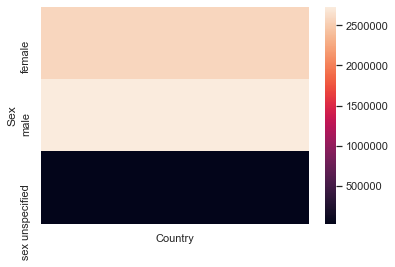

In [67]:
groupbycount_heatmap(whodfs,'Sex','Country')

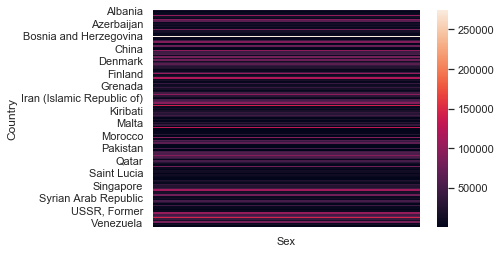

In [106]:
groupbycount_heatmap(whodfs,'Country','Sex')

In [69]:
causesexvsdeath = whodfs.groupby(['Cause','Sex'])['Total Death'].sum()

In [70]:
causesexvsdeath=causesexvsdeath[causesexvsdeath>10000000]

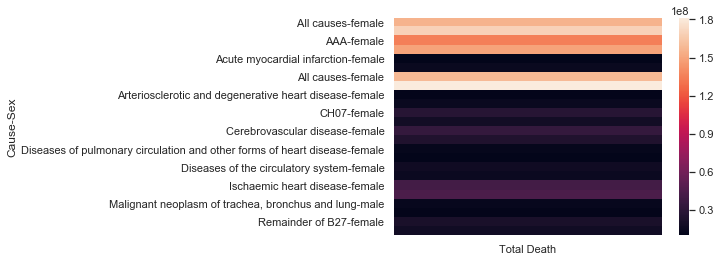

In [71]:
sns.heatmap(causesexvsdeath.to_frame())

In [72]:
def groupbysum_heatmap(df,a,b):
    dfab=df.groupby(a)[b].sum().to_frame()
    return sns.heatmap(dfab)

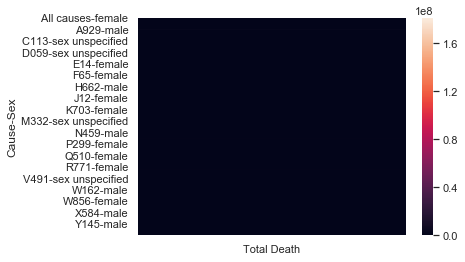

In [73]:
groupbysum_heatmap(whodfs,['Cause','Sex'],'Total Death')

## Using Geopandas to create a map

In [74]:
import geopandas as gpd

In [75]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


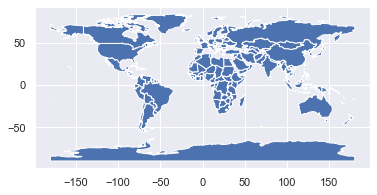

In [76]:
gdf.plot()

In [77]:
causesexvsdeath= pd.DataFrame(causesexvsdeath)

In [103]:
countryvssex= pd.DataFrame(countryvssex)
countryvssex.head(2)

,Sex
Country,
Albania,14106
Andorra,995


In [79]:
countryvssexmerged=gdf.set_index('country').join(countryvssex)

In [104]:
countryvssexmerged.head(2)

,country_code,geometry,Sex
country,,,
Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",7522.0
United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...,NaN


D:\Users\sasyb\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


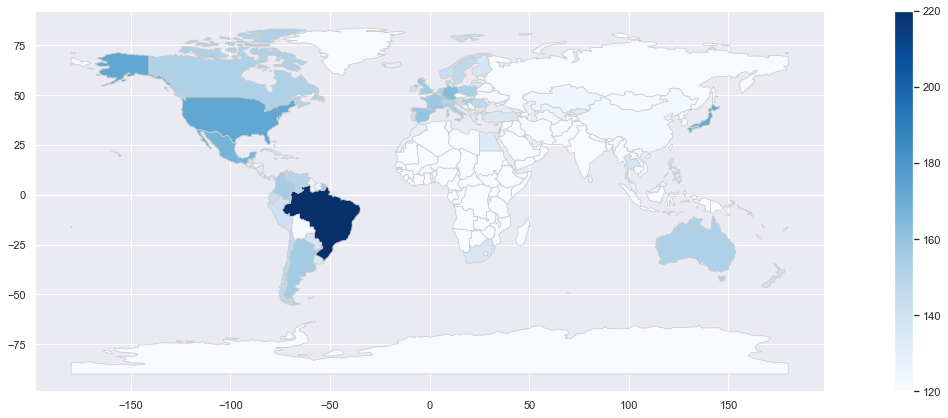

In [81]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Sex'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 7))
countryvssexmerged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis='off'
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

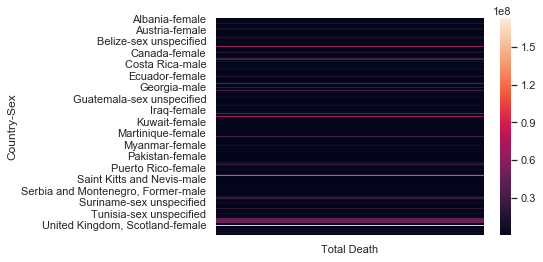

In [82]:
groupbysum_heatmap(whodfs,['Country','Sex'],'Total Death')

In [137]:
countrysexvsdeathgroup=whodfs.groupby(['Country','Sex']).sum()['Total Death'].to_frame()

In [138]:
countrysexvsdeathgroup=countrysexvsdeathgroup.unstack(1)

In [139]:
countrysexmerge= gdf.set_index('country').join(countrysexvsdeathgroup)

D:\Users\sasyb\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [140]:
countrysexmerge.columns = ['country_code', 'geometry', 'Female Death','Male Death','sex unspecified']

In [141]:
countrysexmerge.columns

Index(['country_code', 'geometry', 'Female Death', 'Male Death',
       'sex unspecified'],
      dtype='object')

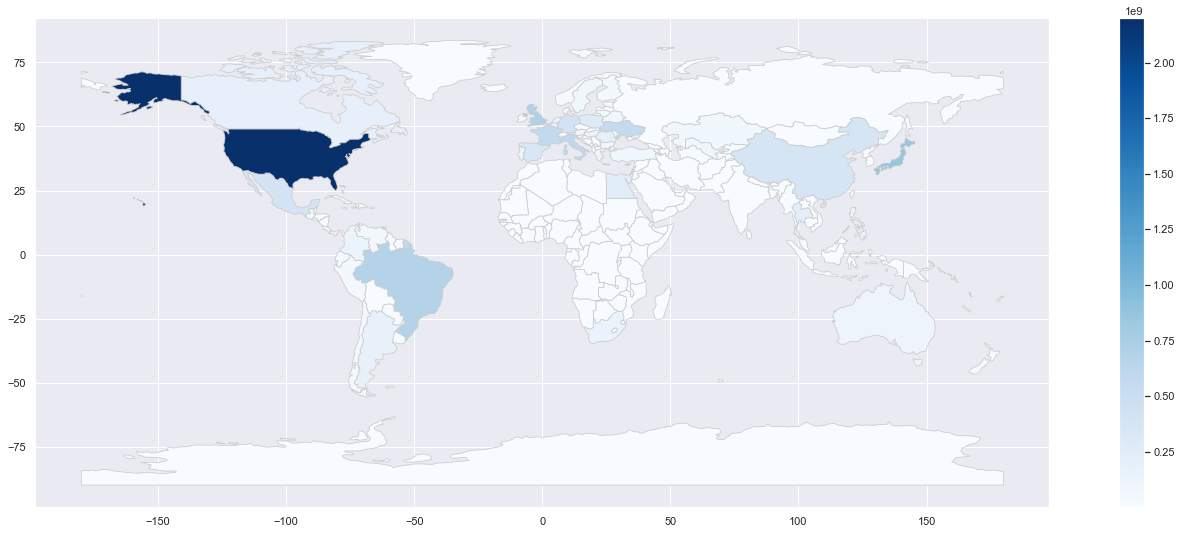

In [142]:
variable = 'Female Death'
# set the range for the choropleth
vmin, vmax = 120, 2200000000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 9))
countrysexmerge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis='off'
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

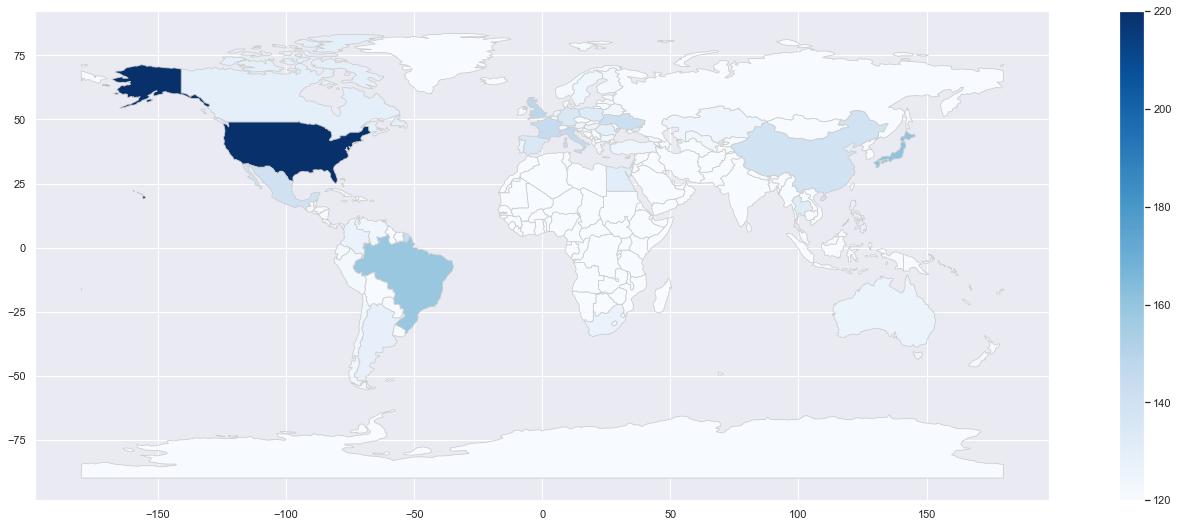

In [130]:
variable = 'Male Death'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 9))
countrysexmerge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis='off'
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [111]:
countrysexmerge.describe()

,Female Death,Male Death,sex unspecified
count,9.600000e+01,9.600000e+01,28.000000
mean,8.790575e+06,9.890189e+06,5545.785714
std,1.958017e+07,2.182922e+07,14931.483540
min,4.105000e+03,4.463000e+03,1.000000
25%,4.324985e+05,5.505592e+05,6.750000
50%,1.803073e+06,1.958099e+06,214.000000
75%,7.487711e+06,8.248004e+06,908.250000
max,1.563761e+08,1.732550e+08,62172.000000


# Focusing  on Cancer 

In [143]:
cancer_names=['malignant','melanoma','leukemia','neoplasm']

In [148]:
whodfs['Cause']=whodfs['Cause'].str.lower()

In [149]:
[whodfs[whodfs['Cause'].str.contains(i)].shape for i in cancer_names]

[(119639, 35), (3258, 35), (0, 35), (141704, 35)]

In [150]:
whodfsofcancer=pd.concat([whodfs[whodfs['Cause'].str.contains(i)] for i in cancer_names]).reset_index().drop('index',axis=1)

In [151]:
countrysexvsdeathcancer=whodfsofcancer.groupby(['Country','Sex']).sum()['Total Death'].to_frame()

In [152]:
countrysexvsdeathcancer=countrysexvsdeathcancer.unstack(1)

In [153]:
countrysexmergecancer= gdf.set_index('country').join(countrysexvsdeathcancer)

In [155]:
countrysexmergecancer.columns = ['country_code', 'geometry', 'Female Death','Male Death','Sex Unspecified']

In [156]:
countrysexmergecancer.columns[2]

'Female Death'

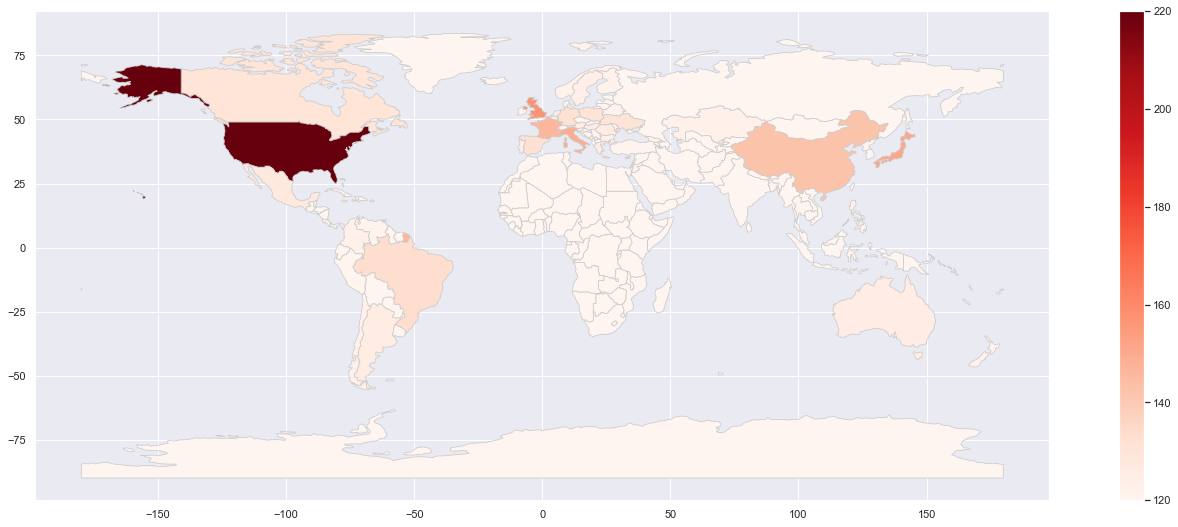

In [157]:
variable = 'Female Death'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 9))
countrysexmergecancer.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis='off'
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

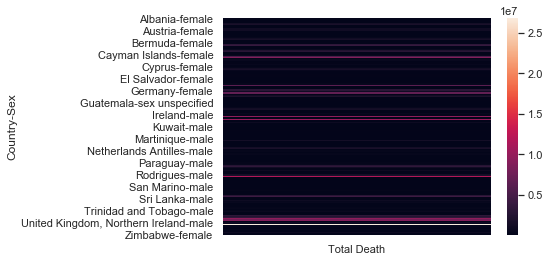

In [158]:
groupbysum_heatmap(whodfsofcancer,['Country','Sex'],'Total Death')

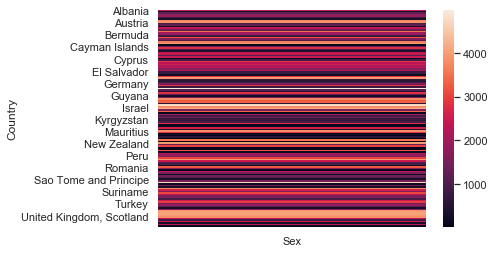

In [159]:
groupbycount_heatmap(whodfsofcancer,'Country','Sex')